In [1]:
import pandas as pd
import numpy as np
from make_df import create_df, make_inputs
from HardEM_1 import HEM_fit, HEM_predictions 
from naive import naive_fit, get_true_labels
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [17]:
#covariates = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

covariates = ['x1', 'x2', 'x3']

#dist = [[3.7, 0.7], [5.1, 2.1], [4.75, 0.9], [10.5, 2.1], [8.75, 3.9], [5.7, 0.9], [3.75, 0.5], [9.75, 3.11], [2.11, 0.9], [7.7, 2.9]]

dist = [[0, 1], [0, 1], [0, 1]]

cols = ['censoring_indicator', 'cure_label']

In [24]:
test_model_weights = np.array([-0.22, -0.35, -0.46,  0.51 ]) #np.random.uniform(-0.5,0.5,4)    #[0.5, -1.5, -1.3, 0.95]

In [25]:
foo = create_df(covariates, dist, 500, test_model_weights, 0.5)

In [26]:
censored_inputs = make_inputs(foo, 0, cols)

noncensored_inputs = make_inputs(foo, 1, cols)

In [27]:
fit = naive_fit(censored_inputs, noncensored_inputs, 'use_clustering')

In [28]:
y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])

In [29]:
from sklearn.metrics import accuracy_score
y_pred = fit['pred']

accuracy_score(y_true, y_pred)

0.96

In [32]:
y_scores = fit['prob']

In [33]:
roc_auc_score(y_true, y_scores)

0.9990991876310272

In [34]:
total_inputs = np.concatenate((censored_inputs, noncensored_inputs), axis=0)

new_df = pd.DataFrame.from_records(total_inputs)

In [35]:
new_df['prob'] = y_scores

new_df['cure_labels'] = y_true

In [36]:
cured = new_df[new_df.cure_labels==0]

not_cured = new_df[new_df.cure_labels==1]

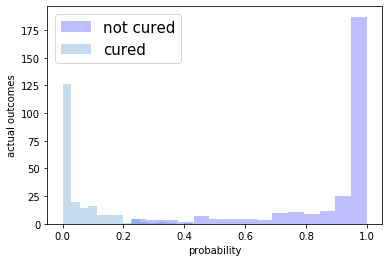

In [37]:
plt.xlabel('probability')
plt.ylabel('actual outcomes')

plt.hist(not_cured['prob'], bins=15, label='not cured', color='blue', alpha=0.25)
plt.hist(cured['prob'], bins=15, label='cured', alpha=0.25)
plt.legend(fontsize=15)

plt.show()

In [3]:
#fit0 = HEM_fit(censored_inputs, noncensored_inputs, 0.5, 1000, 'use_random')

In [80]:
import math
 
#val = math.floor(12.95)
#print(val)

"""You're going to write a binary search function.
You should use an iterative approach - meaning
using loops.
Your function should take two inputs:
a Python list to search through, and the value
you're searching for.
Assume the list only has distinct elements,
meaning there are no repeated values, and 
elements are in a strictly increasing order.
Return the index of value, or -1 if the value
doesn't exist in the list."""

def binary_search(input_array, value):
    
    low = 0
    high = len(input_array)-1
    
    while (low<=high):
         
        mid = low+math.ceil((high-low)/2)
        
        if input_array[mid]==value:
            
            return mid
        
        elif input_array[mid]<value:
            
            low = mid+1
            
        elif input_array[mid]>value:
            
            high = mid-1  
                
    if input_array[mid]!=value:
        
        return -1
            
            
        
            
    
    
        


test_list = [1,3,9,11,15,19,29]
test_val1 = 25
#test_val2 = 15
loo = binary_search(test_list,25)



loo

-1

In [111]:
#Goal {0,1,1,2,3,5,....}

def get_fib(position):
    
    if position==0:
        
        return 0
    
    if position==1:
        
        return 1
    
    else:
        
        return get_fib(position-1)+get_fib(position-2)
    
get_fib(100)    

KeyboardInterrupt: 

In [114]:
#Using loops:

def fib(index):
    
    if index==0:
        
        return 0
    
    elif index==1:
        
        return 1
    
    else:

        pp=0
        p=1
        for i in range(0, index-1):
        
            next=pp+p
            pp=p
            p=next
        return next
    
    

fib(7)

13

In [105]:
pp=0
p=1
    for i in range(0, index-1):
        
        next=pp+p
        pp=p
        p=next
            next

2
2
2
2
2
2
2


In [24]:
def bubble_sort(L):
    for i in range(len(L)):
        swapped = False
        for j in range(len(L)-1-i):
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
                print("Swapped", L[j], "and", L[j+1])
                print(L)
                swapped = True
            else:
                print("No need to swap", L[j], "and", L[j+1])
                print(L)
        if not swapped:
            return

        print("====================================")
#if __name__ == '__main__':
L = [2, 3, 4, 5, 1]
T = [21, 4, 1, 3, 9, 20, 25, 6, 21, 14]
bubble_sort(T)

Swapped 4 and 21
[4, 21, 1, 3, 9, 20, 25, 6, 21, 14]
Swapped 1 and 21
[4, 1, 21, 3, 9, 20, 25, 6, 21, 14]
Swapped 3 and 21
[4, 1, 3, 21, 9, 20, 25, 6, 21, 14]
Swapped 9 and 21
[4, 1, 3, 9, 21, 20, 25, 6, 21, 14]
Swapped 20 and 21
[4, 1, 3, 9, 20, 21, 25, 6, 21, 14]
No need to swap 21 and 25
[4, 1, 3, 9, 20, 21, 25, 6, 21, 14]
Swapped 6 and 25
[4, 1, 3, 9, 20, 21, 6, 25, 21, 14]
Swapped 21 and 25
[4, 1, 3, 9, 20, 21, 6, 21, 25, 14]
Swapped 14 and 25
[4, 1, 3, 9, 20, 21, 6, 21, 14, 25]
Swapped 1 and 4
[1, 4, 3, 9, 20, 21, 6, 21, 14, 25]
Swapped 3 and 4
[1, 3, 4, 9, 20, 21, 6, 21, 14, 25]
No need to swap 4 and 9
[1, 3, 4, 9, 20, 21, 6, 21, 14, 25]
No need to swap 9 and 20
[1, 3, 4, 9, 20, 21, 6, 21, 14, 25]
No need to swap 20 and 21
[1, 3, 4, 9, 20, 21, 6, 21, 14, 25]
Swapped 6 and 21
[1, 3, 4, 9, 20, 6, 21, 21, 14, 25]
No need to swap 21 and 21
[1, 3, 4, 9, 20, 6, 21, 21, 14, 25]
Swapped 14 and 21
[1, 3, 4, 9, 20, 6, 21, 14, 21, 25]
No need to swap 1 and 3
[1, 3, 4, 9, 20, 6, 21, 14, 21,

In [28]:
def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)


Splitting  [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting  [54, 26, 93, 17]
Splitting  [54, 26]
Splitting  [54]
Merging  [54]
Splitting  [26]
Merging  [26]
Merging  [26, 54]
Splitting  [93, 17]
Splitting  [93]
Merging  [93]
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
Splitting  [77, 31, 44, 55, 20]
Splitting  [77, 31]
Splitting  [77]
Merging  [77]
Splitting  [31]
Merging  [31]
Merging  [31, 77]
Splitting  [44, 55, 20]
Splitting  [44]
Merging  [44]
Splitting  [55, 20]
Splitting  [55]
Merging  [55]
Splitting  [20]
Merging  [20]
Merging  [20, 55]
Merging  [20, 44, 55]
Merging  [20, 31, 44, 55, 77]
Merging  [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [27]:
7//2

3

In [79]:
#In place quicksort attempt 

#L = [21, 4, 1, 3, 9, 20, 25, 6, 21, 14]

L = [7, 3, 2, 1]

high = len(L)-1 #the last index
low = 0

def qs(L):

    while low < high: #goes up to second last index
    
    
        if low<high-1:
        
            if L[low]>L[high]:
        
                L[high], L[low], L[high-1] = L[low], L[high-1], L[high]
        
                high = high-1
            
               
            
            else: low += 1     
      
        if low == high-1:
        
            if high>1:
        
                if L[low]>L[high]:
        
                    L[low], L[high] = L[high], L[low]
        
                    high = high-1
                
                    low = 0
    return qs(L)
            
          
            
            
            
     
    

In [89]:
L

[1, 2, 3, 7]

In [157]:

def partition(L, start, end):
    
    if start==end:
        
        return
    
    elif start<end:
        
        high = end
        low = start
        while low<high:
            
            if L[low]>L[high] and low<high-1:
                    
                L[low], L[high], L[high-1] = L[high-1], L[low], L[high]
                    
                high-=1
                
                    
            elif L[low]>L[high] and low==high-1:
                    
                L[high], L[low] = L[low], L[high]
                    
                high-=1
            
        
            else: 
                
                low+=1
                
    return high



            
            

In [164]:
L = [7,3,2,1]

partition(L,0,1)

0

In [165]:
L

[3, 7, 2, 1]

In [167]:
def QS(L, start, end):
    
    if start>=end:
        
        return
    
    else:
        
        pi = partition(L, start, end)
        
        QS(L,0,pi-1)
        QS(L,pi+1,end)

In [170]:
L = [21, 4, 1, 3, 9, 20, 25, 6, 21, 14]

QS(L,0,len(L)-1)

#Finally got it!!!!

In [171]:
L

[1, 3, 4, 6, 9, 14, 20, 21, 21, 25]

In [175]:
def quicksort(array):
    
    QS(array, 0, len(array)-1)
    
    return array

In [176]:


test = [21, 4, 1, 3, 9, 20, 25, 6, 21, 14]

quicksort(test)

[1, 3, 4, 6, 9, 14, 20, 21, 21, 25]

In this quiz, you'll write your own hash table and hash function that uses string keys. Your table will store strings in buckets by their first two letters, according to the formula below:

Hash Value = (ASCII Value of First Letter * 100) + ASCII Value of Second Letter 
You can assume that the string will have at least two letters, and the first two characters are uppercase letters (ASCII values from 65 to 90). You can use the Python function ord() to get the ASCII value of a letter, and chr() to get the letter associated with an ASCII value.

You'll create a HashTable class, methods to store and lookup values, and a helper function to calculate a hash value given a string. You cannot use a Python dictionary—only lists! And remember to store lists at each bucket, and not just the string itself. For example, you can store "UDACITY" at index 8568 as ["UDACITY"].

Start Quiz

In [82]:
#Exercise on hash table:

"""Write a HashTable class that stores strings
in a hash table, where keys are calculated
using the first two letters of the string."""

class HashTable(object):
    def __init__(self):
        self.table = [None]*10000

    def store(self, string):
        """Input a string that's stored in 
        the table."""
        
        if self.table[self.calculate_hash_value(string)] != None:
        
            self.table[self.calculate_hash_value(string)].append(string)
            
        else:
            
            self.table[self.calculate_hash_value(string)]=[string]
            
            
        
        
                
        

    def lookup(self, string):
        """Return the hash value if the
        string is already in the table.
        Return -1 otherwise."""
        
        index = self.calculate_hash_value(string)
        
        if string in self.table[index]:
            
            return index
        
        else:
        
            return -1

    def calculate_hash_value(self, string):
        """Helper function to calulate a
        hash value from a string."""
        
        return ord(string[0])*100+ord(string[1])

    
# Setup
hash_table = HashTable()

# Test calculate_hash_value
# Should be 8568
#print(hash_table.calculate_hash_value('UDACITY'))

# Test lookup edge case
# Should be -1
#print(hash_table.lookup('UDACITY'))

# Test store
#hash_table.store('UDACITY')
# Should be 8568
#print(hash_table.lookup('UDACITY'))

# Test store edge case
hash_table.store('UDACIOUS')
# Should be 8568
print(hash_table.lookup('UDACIOUS'))

hash_table.store('UDACITY')
hash_table.store('Um')

#print(hash_table.table)


8568


In [75]:
ord('U')

85

In [53]:
l=[None]*10

#l = [[] for x in range(10)]

#b=l[0]

#b.append('udacity')



l[0].append('u')


AttributeError: 'NoneType' object has no attribute 'append'

In [64]:
l = ['a','b']

if 0 in list(l.index):
    
    print('yes')
    
else:
    
    print('not in index')

TypeError: 'builtin_function_or_method' object is not iterable

Every node has some value, and pointers to left and right children.

You'll need to implement two methods: search(), which searches for the presence of a node in the tree, and print_tree(), which prints out the values of tree nodes in a pre-order traversal. You should attempt to use the helper methods provided to create recursive solutions to these functions.

In [53]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)

    def search(self, find_val):
        """Return True if the value
        is in the tree, return
        False otherwise."""
    
        
        return self.preorder_search(tree.root, find_val)

    def print_tree(self):
        """Print out all tree nodes
        as they are visited in
        a pre-order traversal."""
        path = ''
        
        return self.preorder_print(self.root, path)[:-1]

    def preorder_search(self, start, find_val):
        """Helper method - use this to create a 
        recursive search solution."""
        
        
        if start:
            
            if start.value == find_val:
            
                return True
        
            else:
            
                return self.preorder_search(start.left, find_val) or self.preorder_search(start.right, find_val)  
        
        
        return False

    def preorder_print(self, start, path):
        """Helper method - use this to create a 
        recursive print solution."""
        
        
        if start:
            
            path+=(str(start.value)+'-')
            
            path=self.preorder_print(start.left, path)
            
            path=self.preorder_print(start.right, path)
        
        return path


# Set up tree
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)

# Test search
# Should be True
#print(tree.search(4))
# Should be False
#print(tree.search(4))

# Test print_tree
# Should be 1-2-4-5-3
print(tree.print_tree())



1-2-4-5-3


In [27]:
[1,2]+[[3,4]]

[1, 2, [3, 4]]

In [45]:
l = [1,2]

new=[]

for element in l:
    
    new.append(str(element)+'-')
    
new    

['1-', '2-']

In [49]:
str(1)+'-'

'1-'